# 7장. 통계분석

# [2] 상관분석 + 히트맵
#      타이타닉호 생존율 분석하기

## 3. 데이터 수집

In [6]:
import seaborn as sns

In [7]:
import pandas as pd

In [8]:
titanic = sns.load_dataset("titanic")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [58]:
fpath = 'C:/Users/82105/OneDrive/바탕 화면/4-1 강의/SDA41/code/test-git/'

In [59]:
titanic.to_csv(fpath + 'titanic.csv', index = False)

## 4. 데이터 준비

#### - 결측값 있는지 확인하기

In [40]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         891 non-null    category
 12  embark_town  891 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [41]:
titanic.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

#### - age 열의 결측값을 중앙값으로 치환하기

In [42]:
titanic['age'] = titanic['age'].fillna(titanic['age'].median())

#### - embarked 열의 결측값을 최빈값으로 치환하기

In [16]:
titanic['embarked'].value_counts()

embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [45]:
titanic['embarked'] = titanic['embarked'].fillna('S')

#### - embark_town 열의 결측값을 최빈값으로 치환하기

In [46]:
titanic['embark_town'].value_counts()

embark_town
Southampton    646
Cherbourg      168
Queenstown      77
Name: count, dtype: int64

In [47]:
titanic['embark_town'] = titanic['embark_town'].fillna('Southampton')

#### - deck 열의 결측값을 최빈값으로 치환하기

In [48]:
titanic['deck'].value_counts()

deck
C    747
B     47
D     33
E     32
A     15
F     13
G      4
Name: count, dtype: int64

In [49]:
titanic['deck'] = titanic['deck'].fillna('C')

#### - 결측치가 다 채워졌는지 확인하기

In [50]:
titanic.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

## 5. 데이터 탐색

### 5.1 데이터의 기본 정보 탐색하기

In [51]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         891 non-null    category
 12  embark_town  891 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [52]:
titanic.survived.value_counts()

survived
0    549
1    342
Name: count, dtype: int64

### 5.2 차트를 그려 데이터를 시각적으로 탐색하기

In [60]:
import matplotlib.pyplot as plt

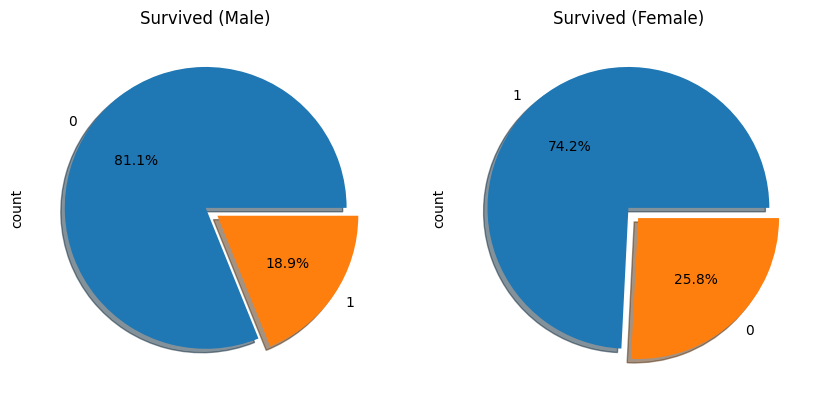

In [61]:
f,ax = plt.subplots(1, 2, figsize = (10, 5))

titanic['survived'][titanic['sex'] == 'male'].value_counts().plot.pie(explode = [0,0.1], autopct = '%1.1f%%', ax = ax[0], shadow = True)
titanic['survived'][titanic['sex'] == 'female'].value_counts().plot.pie(explode = [0,0.1], autopct = '%1.1f%%', ax = ax[1], shadow = True)
ax[0].set_title('Survived (Male)')
ax[1].set_title('Survived (Female)')

plt.show()

### 5.3 등급별 생존자 수를 차트로 나타내기

In [62]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,C,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,C,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,C,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,C,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,28.0,1,2,23.4500,S,Third,woman,False,C,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


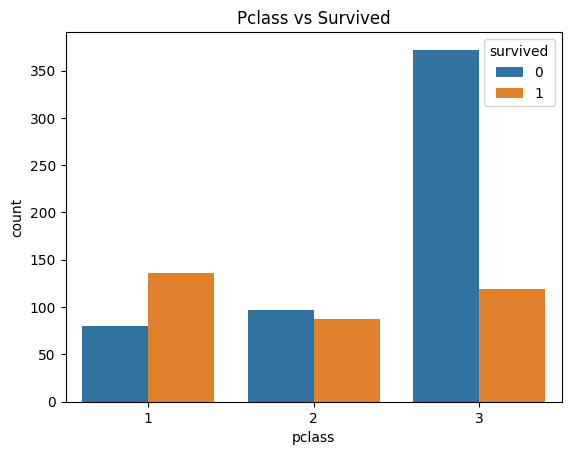

In [56]:
sns.countplot(x='pclass', hue = 'survived', data=titanic)
plt.title('Pclass vs Survived')
plt.show()

## 6. 데이터 모델링

### 6.1 상관분석을 위한 상관계수를 구하고 저장하기

In [63]:
titanic_corr = titanic.corr(method = 'pearson')

ValueError: could not convert string to float: 'male'

In [31]:
titanic_corr

NameError: name 'titanic_corr' is not defined

In [ ]:
titanic_corr.to_csv(fpath + '/data/titanic_corr.csv', index = False)

### 6.2 상관계수 확인하기

#### - 저장한 titanic_corr.csv 파일을 열어본다

### 6.3 특정 변수 사이의 상관계수 구하기

In [ ]:
titanic['survived'].corr(titanic['adult_male'])

In [ ]:
titanic['survived'].corr(titanic['fare'])

## 7. 결과 시각화

### 7.1 산점도로 상관 분석 시각화하기

In [ ]:
sns.pairplot(titanic, hue = 'survived')

plt.show()

### 7.2 두 변수의 상관관계 시각화하기

#### - 객실 등급과 생존의 상관관계를 seaborn 패키지의 catplot으로 시각화해보자

In [ ]:
sns.catplot(x = 'pclass', y = 'survived', hue = 'sex', data = titanic, kind = 'point')

plt.show()

### 7.3 변수 사이의 상관 계수를 히트맵으로 시각화하기

In [27]:
def category_age(x):
    if x < 10:
        return 0
    elif x < 20:
        return 1
    elif x < 30:
        return 2
    elif x < 40:
        return 3
    elif x < 50:
        return 4
    elif x < 60:
        return 5
    elif x < 70:
        return 6
    else:
        return 7

In [28]:
titanic['age2'] = titanic['age'].apply(category_age)

In [29]:
titanic['sex'] = titanic['sex'].map({'male':1, 'female':0})

In [30]:
titanic['family'] = titanic['sibsp'] + titanic['parch'] + 1

In [31]:
titanic.to_csv(fpath + '/data/titanic3.csv', index = False)

In [32]:
titanic.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age2,family
0,0,3,1,22.0,1,0,7.2500,S,Third,man,True,C,Southampton,no,False,2,2
1,1,1,0,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,3,2
2,1,3,0,26.0,0,0,7.9250,S,Third,woman,False,C,Southampton,yes,True,2,1
3,1,1,0,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,3,2
4,0,3,1,35.0,0,0,8.0500,S,Third,man,True,C,Southampton,no,True,3,1
5,0,3,1,28.0,0,0,8.4583,Q,Third,man,True,C,Queenstown,no,True,2,1
6,0,1,1,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True,5,1
7,0,3,1,2.0,3,1,21.0750,S,Third,child,False,C,Southampton,no,False,0,5
8,1,3,0,27.0,0,2,11.1333,S,Third,woman,False,C,Southampton,yes,False,2,3
9,1,2,0,14.0,1,0,30.0708,C,Second,child,False,C,Cherbourg,yes,False,1,2


In [33]:
heatmap_data = titanic[['survived', 'sex', 'age2', 'family', 'pclass', 'fare']]

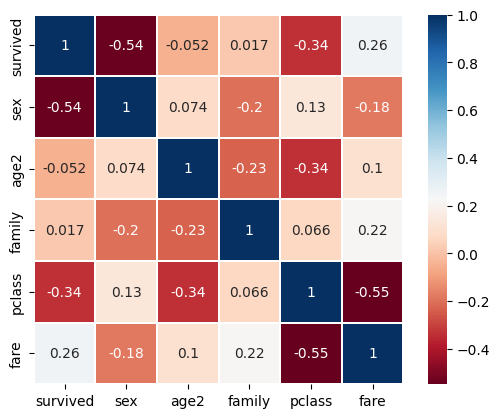

In [34]:
colormap = plt.cm.RdBu

sns.heatmap(heatmap_data.astype(float).corr(), linewidths = 0.1, vmax = 1.0, square = True, cmap = colormap, linecolor = 'white', annot = True,
annot_kws = {"size": 10})

plt.show()